In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lng
import scipy.io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, mean_squared_error

In [3]:
"""scipy.io.loadmat("diabetes.mat")
(i+1)%K+1 # use modulus K to get folds
np.random.permutation(N) # random permuation of N values
Xtrain = X[i != I, :] #Training Data
np.trance(outer) # trace of the matrix outer
np.random.randint(0,N,N) # sample with replacement
scipy.io.loadmat("Silhouettes.mat")
KNeighborsClassifier()"""
print

## 1) A

In [4]:

def ridge_fit(X,y,lam):
    X = np.mat(X)
    Beta = np.linalg.pinv(X.T*X+lam*np.eye(X.shape[1]))*X.T*y    
    return Beta


def ridge_predict(x,Beta):
    y = np.dot(x,Beta)
    return y

def generate_k_folds(X_data,y_data,k):
    l = X_d.shape[0];
    # ranges
    rans = [(i*l/k,(i+1)*l/k) for i in range(k)]
    # folds
    x_folds = [X_data[ran[0]:ran[1],:] for ran in rans]
    y_folds = [y_data[ran[0]:ran[1]] for ran in rans]
    return x_folds,y_folds

In [5]:
# load data
data_diab = scipy.io.loadmat("diabetes.mat")

X_d = data_diab['X']
y_d = data_diab['y']

n_of_attributes = 10
n_of_samples = 14
x = [[0.5 for y in range(n_of_attributes)] for x in range(14)]

#x
lam = 0.5
ridge_predict(x,ridge_fit(X_d,y_d,lam))

matrix([[ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286],
        [ 415.10527286]])

# 1) B

In [6]:
k = 10 # number of folds
print 'v,'+((k-1)*' t,')

# construct cross validation matrix
for i in range(k):
    i_test = i
    i_validation = range(k)
    i_validation.remove(i)
    print i_test,i_validation

v, t, t, t, t, t, t, t, t, t,
0 [1, 2, 3, 4, 5, 6, 7, 8, 9]
1 [0, 2, 3, 4, 5, 6, 7, 8, 9]
2 [0, 1, 3, 4, 5, 6, 7, 8, 9]
3 [0, 1, 2, 4, 5, 6, 7, 8, 9]
4 [0, 1, 2, 3, 5, 6, 7, 8, 9]
5 [0, 1, 2, 3, 4, 6, 7, 8, 9]
6 [0, 1, 2, 3, 4, 5, 7, 8, 9]
7 [0, 1, 2, 3, 4, 5, 6, 8, 9]
8 [0, 1, 2, 3, 4, 5, 6, 7, 9]
9 [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [7]:
k=5
X_folds, y_folds = generate_k_folds(X_d,y_d,k) # generate folds

In [8]:
print len(X_folds[1])
print len(X_folds[2])

len(np.concatenate([X_folds[1],X_folds[2]]))

88
89


177

In [9]:
zook =[]

print "l,MSE"
for lam in [(i+0.0)/100 for i in range(100)]:
    zinf = []
    for i in range(k):
        i_validation = i
        i_train = range(k)
        i_train.remove(i)
        """print 8*'--'
        print 'fold distribution'
        print 'v,'+((k-1)*' t,')
        print i_validation,i_train"""

        # build validation data
        data_validation_x = X_folds[i_validation]
        data_validation_y = y_folds[i_validation]

        # build training data
        data_training_x = np.concatenate([X_folds[fold] for fold in i_train])
        data_training_y = np.concatenate([y_folds[fold] for fold in i_train])

        # training
        Betas = ridge_fit(data_training_x,data_training_y,lam)

        # validation
        data_predicted_y = ridge_predict(data_validation_x,Betas)
        zinf.append(mean_squared_error(data_validation_y,data_predicted_y))

    zook.append((lam,sum(zinf)/len(zinf)))

l,MSE


In [10]:
%matplotlib inline
#plt.plot(zook)
x,y = zip(*zook)

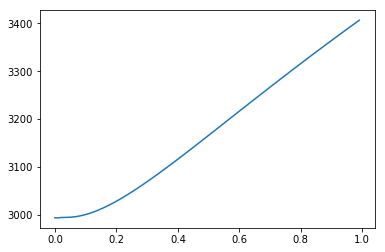

In [11]:
%matplotlib inline
plt.plot(x,y)